pip install tables

<Axes: title={'center': 'All Denver Crimes'}, xlabel='REPORTED_DATE'>

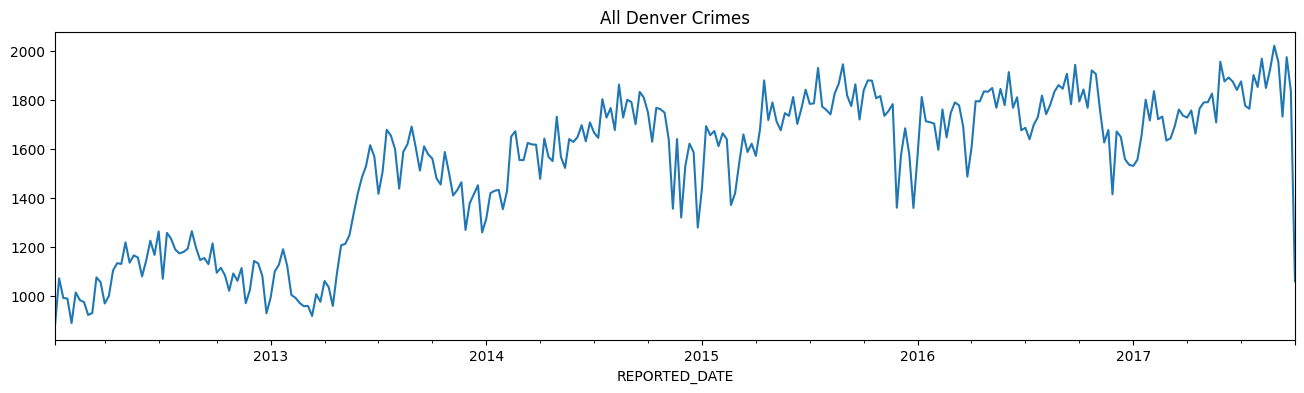

In [9]:
import pandas as pd

# crime.h5を読み込み、犯罪データを取得する。日付を基準に週ごとの件数を
# 2通りの方法で集計し、結果が同じか比較する。最後に全期間の
# 犯罪件数の推移を可視化して確認する。

crime = pd.read_hdf("crime.h5", "crime")

# 1. groupby + Grouper の方法（日時をindexにして週ごと集計）
weekly_crimes_gby = (
    crime
    .set_index("REPORTED_DATE")
    .groupby(pd.Grouper(freq="W"))
    .size()
)

# 2. 列指定でgroupby（index設定なしで週ごと集計）
weekly_crimes_gby2 = crime.groupby(
    pd.Grouper(key="REPORTED_DATE", freq="W")
).size()

# 3. 両者の集計結果が一致するか確認
weekly_crimes_gby2.equals(weekly_crimes_gby)

# 週次犯罪件数を可視化
weekly_crimes.plot(figsize=(16,4), title='All Denver Crimes')


<Axes: title={'center': 'Denver Crimes and Traffic Accidents'}, xlabel='REPORTED_DATE'>

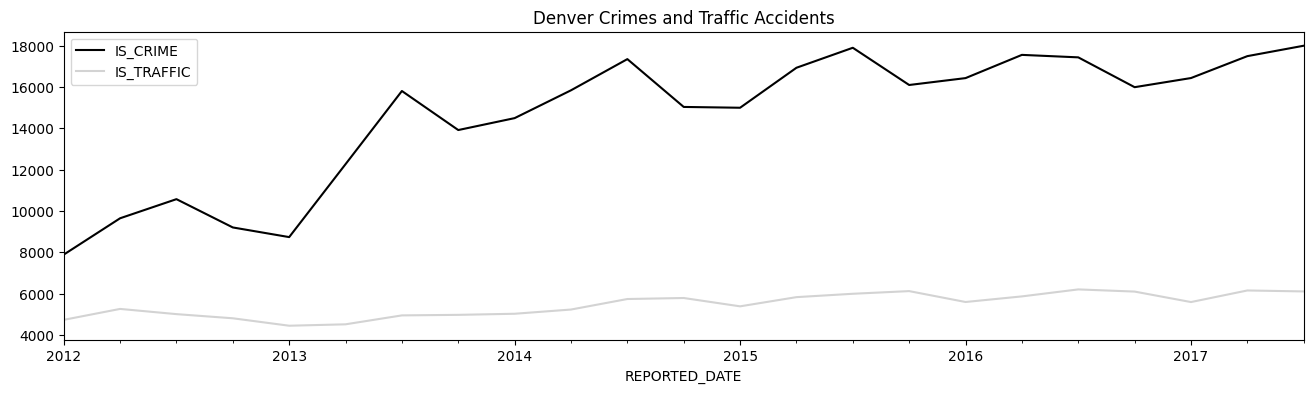

In [15]:
crime_sort = pd.read_hdf('crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

# 四半期集計（Quarter-End）
crime_quarterly = crime_sort.resample('QE')[['IS_CRIME', 'IS_TRAFFIC']].sum()

# QS との比較（Quarter-Start）
crime_quarterly_QS = crime_sort.resample('QS')[['IS_CRIME', 'IS_TRAFFIC']].sum()

# 手動チェック
crime_sort.loc['2012-04-01':'2012-06-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

# groupby + Grouper
crime_quarterly2 = crime_sort.groupby(
    pd.Grouper(freq='QE')
)[['IS_CRIME', 'IS_TRAFFIC']].sum()

crime_quarterly2.equals(crime_quarterly)

# プロット
plot_kwargs = dict(figsize=(16,4), 
                   color=['black', 'lightgrey'], 
                   title='Denver Crimes and Traffic Accidents')
crime_quarterly.plot(**plot_kwargs)
